In [74]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scikit_posthocs as sp

## INTRODUCTION

Breast cancer is the most common form of cancer among women in the United States. Therefore, understanding it's function is vital to guide patients to the best possible treatment(s). I would like to focus my analysis on mutation count and compare it to the patient's survival outcome to get a better understanding at the genotypic level and it's affect at the phenotypic level. The mutation count can give us a small glimpse at what's happening molecularly and can maybe provide a better insight on breast cancer.

## HYPOTHESIS

Ho: There is no significant difference in mutation count in individuals with breast cancer versus the survival outcome of patients, on average.

Ha: There is a significant difference in mutation count in individuals with breast cancer versus the survival outcome of patients, on average.

## DATA

The dataset comes from kaggle and contains 2509 obseevations and 35 variables. There are many null values but once removed we are left with just 1092 observations. The three groups that compose the 'Patient's Vital Status' variable has three groups for which I will examine. The following is the group name and the number of observations after removal of the null values: 'living': 484, 'died of disease': 370, 'died of other causes': 238.

The dataset can be found here: https://www.kaggle.com/gunesevitan/breast-cancer-metabric

### Basic Data Information and Cleaning

In [75]:
bc_df = pd.read_csv('Breast Cancer METABRIC.csv').dropna()

In [205]:
bc_df.shape

(1092, 34)

In [77]:
bc_df.reset_index().head()

,index,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
1,4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
2,5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
3,10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
4,11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


In [206]:
bc_df['Patient ID'].nunique()

1092

In [207]:
bc_df.drop_duplicates(subset=['Patient ID'], inplace=True)

In [204]:
bc_df['Mutation Count'].count()

1092

In [192]:
bc_df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [194]:
bc_df['HER2 status measured by SNP6'].value_counts()

Neutral    793
Gain       241
Loss        56
Undef        2
Name: HER2 status measured by SNP6, dtype: int64

### Visualizations

#### Heatmap and Scatterplot Correlation Among Quantitative Variables

<AxesSubplot:>

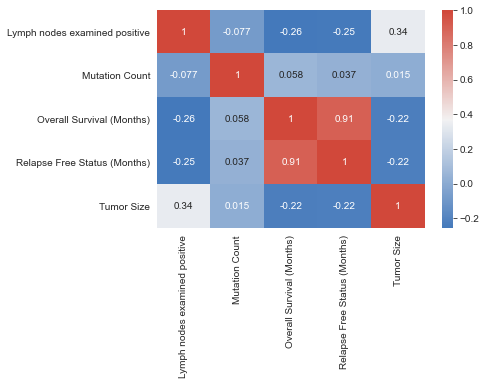

In [165]:
#Source: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
quant_var = bc_df[['Lymph nodes examined positive', 'Mutation Count', 'Overall Survival (Months)', 
                   'Relapse Free Status (Months)', 'Tumor Size']]
corr = quant_var.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(250, 15, as_cmap=True),)

We see a high positive correlation between Relapse free status (Months) and overall survival (Months). There is a slight positive correlation between tumor size and lymph nodes.

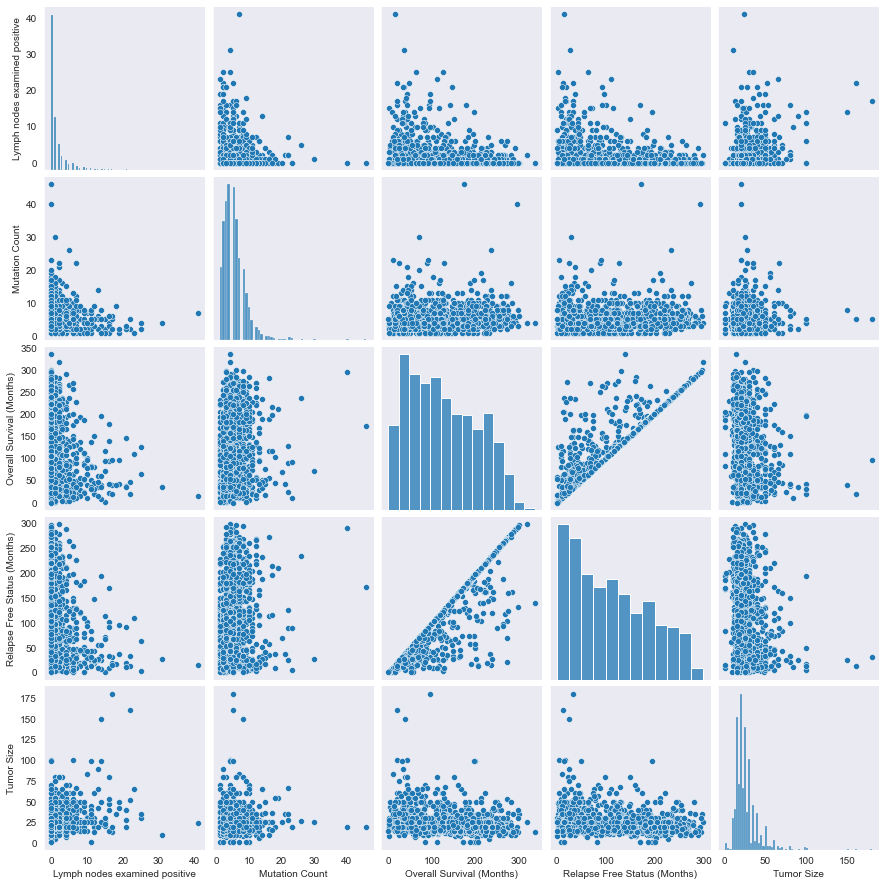

In [170]:
sns.pairplot(quant_var)

#### univariate graphs to understand the individuals in the dataset

count    1092.000000
mean       60.393526
std        13.000930
min        21.930000
25%        50.787500
50%        60.995000
75%        69.705000
max        96.290000
Name: Age at Diagnosis, dtype: float64

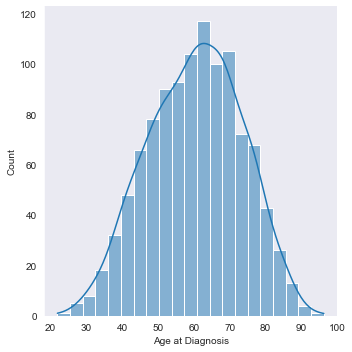

In [80]:
sns.displot(bc_df['Age at Diagnosis'], kde=True)
bc_df['Age at Diagnosis'].describe()

Individuals in this data seem to be around 60-61 years old

count    1092.000000
mean      126.545452
std        77.134919
min         0.100000
25%        60.825000
50%       116.983333
75%       188.433333
max       337.033333
Name: Overall Survival (Months), dtype: float64

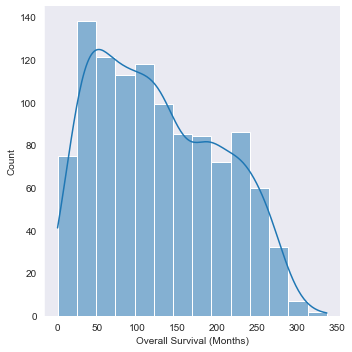

In [220]:
sns.displot(bc_df['Overall Survival (Months)'], kde=True)
bc_df['Overall Survival (Months)'].describe()

There is somewhat of a right skew. Most individuals have an overall survival (months) at around 50 to 100

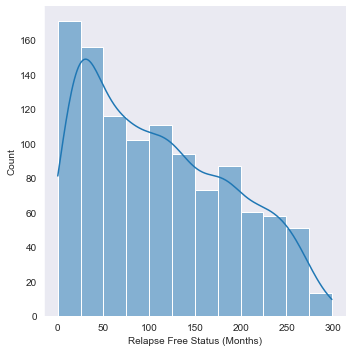

In [186]:
sns.displot(bc_df['Relapse Free Status (Months)'], kde=True)

#### Bivariate graphs to understand the relationships between categorical and quantitative variables

<AxesSubplot:xlabel='Pam50 + Claudin-low subtype', ylabel='Relapse Free Status (Months)'>

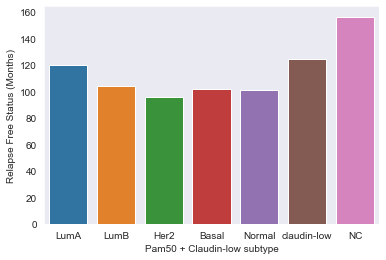

In [88]:
sns.barplot(x='Pam50 + Claudin-low subtype', y='Relapse Free Status (Months)', data=bc_df, ci=None)

<AxesSubplot:xlabel='Pam50 + Claudin-low subtype', ylabel='Relapse Free Status (Months)'>

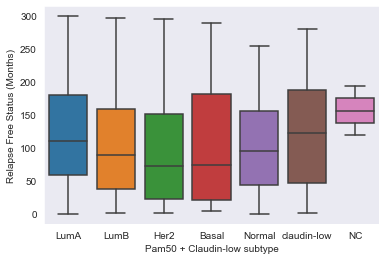

In [149]:
sns.boxplot(x='Pam50 + Claudin-low subtype', y='Relapse Free Status (Months)', data=bc_df)

Text(0.5, 1.0, 'Cellularity and Tumor Size')

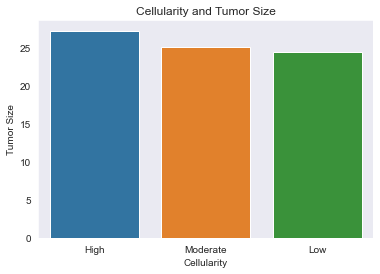

In [133]:
cell_size = sns.barplot(x='Cellularity', y='Tumor Size', data=bc_df, ci=None)
cell_size.set_title('Cellularity and Tumor Size')

Text(0.5, 1.0, 'Cellularity and Tumor Size')

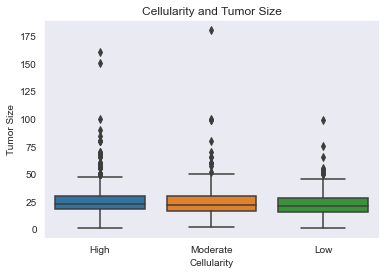

In [148]:
cell_size = sns.boxplot(x='Cellularity', y='Tumor Size', data=bc_df)
cell_size.set_title('Cellularity and Tumor Size')

Text(0.5, 1.0, 'Hormone and Outcome')

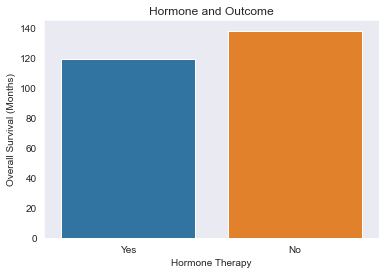

In [118]:
hormone = sns.barplot(x='Hormone Therapy', y='Overall Survival (Months)', data=bc_df, ci=None)
hormone.set_title('Hormone and Outcome')

Text(0.5, 1.0, 'Hormone and Outcome')

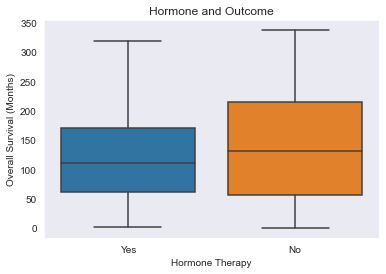

In [224]:
hormone = sns.boxplot(x='Hormone Therapy', y='Overall Survival (Months)', data=bc_df)
hormone.set_title('Hormone and Outcome')

Text(0.5, 1.0, 'Chemotherapy and Outcome')

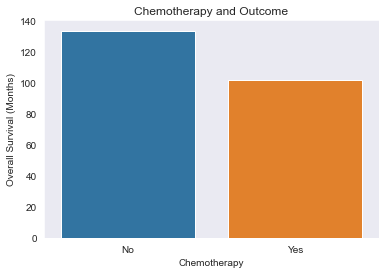

In [221]:
hormone = sns.barplot(x='Chemotherapy', y='Overall Survival (Months)', data=bc_df, ci=None)
hormone.set_title('Chemotherapy and Outcome')

Text(0.5, 1.0, 'Chemotherapy and Outcome')

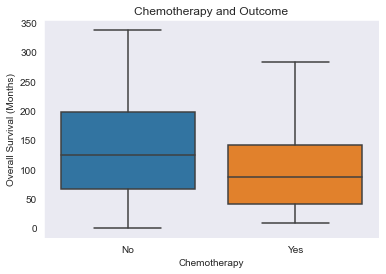

In [222]:
chemo = sns.boxplot(x='Chemotherapy', y='Overall Survival (Months)', data=bc_df)
chemo.set_title('Chemotherapy and Outcome')

Text(0.5, 1.0, 'Radiation Therapy and Outcome')

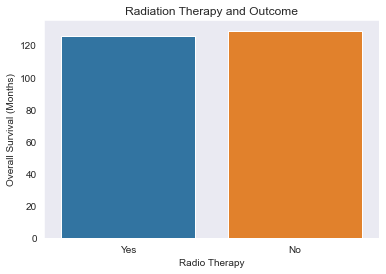

In [145]:
radio = sns.barplot(x='Radio Therapy', y='Overall Survival (Months)', data=bc_df, ci=None)
radio.set_title('Radiation Therapy and Outcome')

Text(0.5, 1.0, 'Radiation Therapy and Outcome')

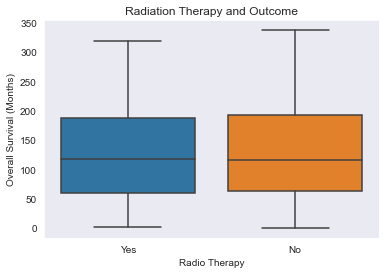

In [223]:
radio = sns.boxplot(x='Radio Therapy', y='Overall Survival (Months)', data=bc_df)
radio.set_title('Radiation Therapy and Outcome')

Interestingly, the individuals in our sample who don't take chemotherapy have higher overall survival (months). Those who take hormonal therapy are having more positive survival outcomes. Those taking Radiation Therapy see no difference in survival outcomes

#### Target Variable (Mutation Count) graphs

In [17]:
bc_df['Mutation Count'].describe()

count    1092.000000
mean        5.471612
std         3.812051
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        46.000000
Name: Mutation Count, dtype: float64

Text(0.5, 1.0, 'Mutation and Survival Outcome')

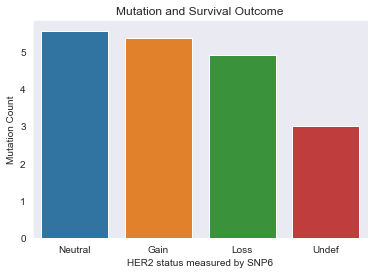

In [196]:
mutation_her2 = sns.barplot(x='HER2 status measured by SNP6', y='Mutation Count',data=bc_df, ci=None)
mutation_her2.set_title('Mutation and Survival Outcome')

<AxesSubplot:xlabel='HER2 status measured by SNP6', ylabel='Mutation Count'>

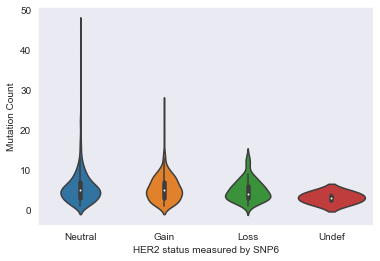

In [199]:
sns.violinplot(x=bc_df['HER2 status measured by SNP6'], y=bc_df['Mutation Count'])

<AxesSubplot:xlabel='HER2 status measured by SNP6', ylabel='Mutation Count'>

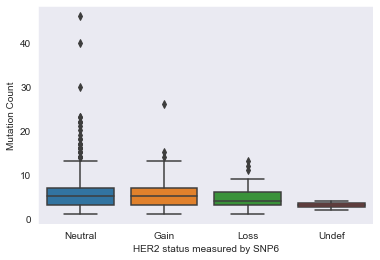

In [201]:
sns.boxplot(x=bc_df['HER2 status measured by SNP6'], y=bc_df['Mutation Count'])

<AxesSubplot:xlabel='HER2 status measured by SNP6', ylabel='Relapse Free Status (Months)'>

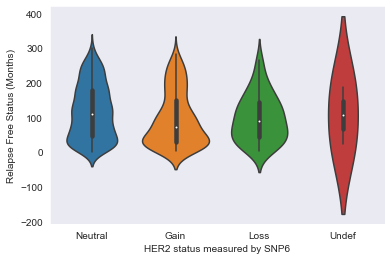

In [200]:
sns.violinplot(x=bc_df['HER2 status measured by SNP6'], y=bc_df['Relapse Free Status (Months)'])

Her2 is an indicator of strength of breast cancer. Positive(Gain) Her2 has a more aggressive form of breast cancer, whereas Negative(Loss) has a slow and less aggressive form of breast cancer and often times recover because of this. 

Text(0.5, 1.0, 'Mutation and Survival Outcome')

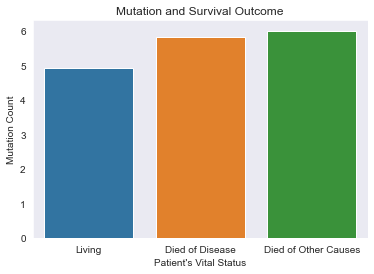

In [195]:
mutation_outcome = sns.barplot(x='Patient\'s Vital Status', y='Mutation Count',data=bc_df, ci=None)
mutation_outcome.set_title('Mutation and Survival Outcome')

#### Understanding the survival status of the individuals

In [20]:
bc_df['Patient\'s Vital Status'].value_counts()


Living                  484
Died of Disease         370
Died of Other Causes    238
Name: Patient's Vital Status, dtype: int64

## METHODS

we want to first take our groupings from the 'Patient\'s Vital Status' variable. The groups are 'living', 'died of diease', and 'died of other causes'. Since I don't have too big of a sample size for each group I feel comfortable separating each one into their own dataframe. 

In [215]:
living = bc_df[(bc_df['Patient\'s Vital Status'] == 'Living')]
print(f'The sample size of living individuals: {living.shape[0]}')

dead_bc = bc_df[(bc_df['Patient\'s Vital Status'] == 'Died of Disease')]
print(f'The sample size of individuals who have passed away due to breast cancer: {dead_bc.shape[0]}')

dead_other = bc_df[(bc_df['Patient\'s Vital Status'] == 'Died of Other Causes')]
print(f'The sample size of individuals who have passed away due other causes: {dead_other.shape[0]}')

The sample size of living individuals: 484
The sample size of individuals who have passed away due to breast cancer: 370
The sample size of individuals who have passed away due other causes: 238


Here we have useful information about the groups such as the datatype and the number of non-null values. 

In [134]:
def info(groups):
    print('\n')
    groups.info()
    
info(living)
info(dead_bc)
info(dead_other)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 1 to 1743
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      484 non-null    object 
 1   Age at Diagnosis                484 non-null    float64
 2   Type of Breast Surgery          484 non-null    object 
 3   Cancer Type                     484 non-null    object 
 4   Cancer Type Detailed            484 non-null    object 
 5   Cellularity                     484 non-null    object 
 6   Chemotherapy                    484 non-null    object 
 7   Pam50 + Claudin-low subtype     484 non-null    object 
 8   Cohort                          484 non-null    float64
 9   ER status measured by IHC       484 non-null    object 
 10  ER Status                       484 non-null    object 
 11  Neoplasm Histologic Grade       484 non-null    float64
 12  HER2 status measured by SNP6    4

Here is the overall look at mutation count without grouping

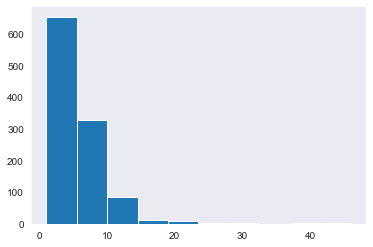

In [128]:
plt.hist(bc_df['Mutation Count'])
plt.show()

I ran three distributions overlapping each other for comparison. A you can see they are pretty similar in distribution. 

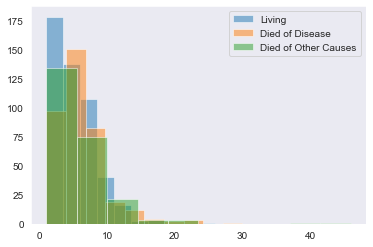

In [127]:
plt.hist(living['Mutation Count'], alpha = .5, label = "Living")
plt.hist(dead_bc['Mutation Count'], alpha = .5, label = "Died of Disease")
plt.hist(dead_other['Mutation Count'], alpha= .5, label = "Died of Other Causes")
plt.legend(loc="upper right")
plt.show()

#### Skewness and Kurtosis Test

Just for good measures I went ahead and checked out the skewness and kurtosis of each series. They aren't normally distributed so I will have to run a non-parametric test. I decided to run a Kruskal-Wallis test because it is quite skewed and I am working with three variables

In [24]:
print(stats.describe(living['Mutation Count']))
print(stats.describe(dead_bc['Mutation Count']))
print(stats.describe(dead_other['Mutation Count']))

DescribeResult(nobs=484, minmax=(1.0, 26.0), mean=4.933884297520661, variance=9.29996748969081, skewness=1.5118937540220838, kurtosis=5.094874545577623)
DescribeResult(nobs=370, minmax=(1.0, 30.0), mean=5.8297297297297295, variance=14.95466930344979, skewness=1.9833706683430952, kurtosis=6.7210158960973985)
DescribeResult(nobs=238, minmax=(1.0, 46.0), mean=6.008403361344538, variance=23.57798815728823, skewness=4.366468404768207, kurtosis=28.623729940024315)


#### Visualizing relationship between mutation count and survival status

Here I have a boxplot and violin plot to get a preliminary understanding of my independent and dependent variables before I ran the test

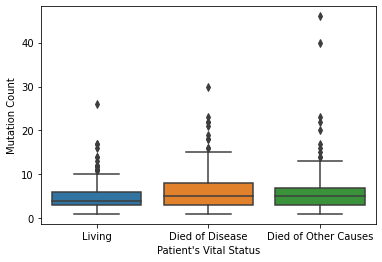

In [25]:
ax = sns.boxplot(x=bc_df['Patient\'s Vital Status'], y=bc_df['Mutation Count'])
#ax = sns.swarmplot(x=bc_df['Patient\'s Vital Status'], y=bc_df['Tumor Size'], color=".25")

<AxesSubplot:xlabel="Patient's Vital Status", ylabel='Mutation Count'>

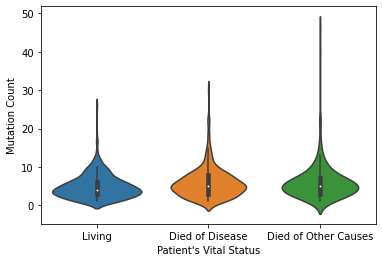

In [26]:
sns.violinplot(x=bc_df['Patient\'s Vital Status'], y=bc_df['Mutation Count'])

I first ran the mood median's test first since it's more robust when dealing with outliers

In [27]:
print(stats.median_test(living['Mutation Count'], dead_other['Mutation Count'], dead_bc['Mutation Count']))

(9.80553295145499, 0.007426010749140945, 5.0, array([[169, 104, 165],
       [315, 134, 205]], dtype=int64))


Now I have run the Kruskal-Wallis test, it is less robust when dealing with outliers but it is more stable

In [28]:
print(stats.kruskal(living['Mutation Count'], dead_bc['Mutation Count'], dead_other['Mutation Count']))

KruskalResult(statistic=16.15389500363717, pvalue=0.00031061774987805777)


Finally I ran a Mann-Whitney test to have a clear understanding between the pairs 

In [89]:
print(stats.mannwhitneyu(x=living['Mutation Count'], y=dead_bc['Mutation Count']))
print(stats.mannwhitneyu(x=dead_bc['Mutation Count'], y=dead_other['Mutation Count']))
print(stats.mannwhitneyu(x=living['Mutation Count'], y=dead_other['Mutation Count']))

MannwhitneyuResult(statistic=77262.0, pvalue=0.0002717639625187274)
MannwhitneyuResult(statistic=43979.5, pvalue=0.490508458893215)
MannwhitneyuResult(statistic=49199.5, pvalue=0.0006665303742629587)


## RESULTS

Based on the p-value (0.0003) from the Kruskal-Wallis test, we can say that there is a significant difference between our three groups. I will reject the null hypothesis. I then ran a post-hoc Mann-Whitney test and it seems that the groups 'dead from disease' and 'dead from other causes' are not significantly different.

## DISCUSSION/CONCLUSION

I found it very interesting to see no difference between 'dead from disease' and 'dead from other causes' based on mutation count. These groups do have slightly higher mutation counts compared to the 'living' group. This might suggest other factors affecting the survival outcome. It could be that mutation counts are good indicators of survival outcome among those with breast cancer. However, those who died from other causes might have been due to higher mutation counts affecting their non-breast cancer issues.

For further research, I would be interested in seeing health plus survival outcome among breast cancer individuals based on mutation count. I think this would further breakdown our understanding of how mutations can perhaps play a role in indicating survival outcomes. From there we can get better insight into the type of treatments for those dealing with breast cancer. 